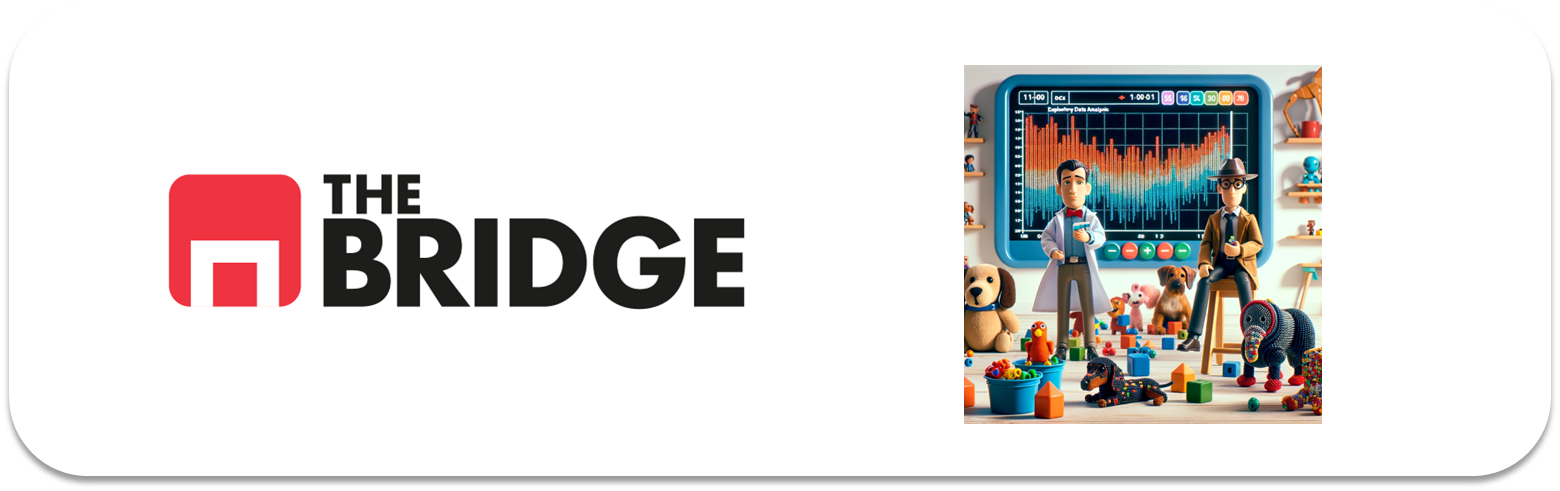

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bootcampviztools import*
from scipy.stats import mannwhitneyu

## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [82]:
pd.read_csv("./data/titanic.csv")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [83]:
df_titanic = pd.read_csv("./data/titanic.csv")
df = df_titanic.copy()

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [84]:
df.drop(columns=["deck","survived","pclass","embarked"],inplace=True)

In [85]:
df

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [86]:
df[["parch","sibsp"]]

,parch,sibsp
0,0,1
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
886,0,0
887,0,0
888,2,1
889,0,0


In [87]:
df["family_members"] = df.parch+df.sibsp
df.family_members

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: family_members, Length: 891, dtype: int64

In [88]:
df.drop(columns=["parch","sibsp"],inplace=True)

In [89]:
df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [90]:
df.embark_town.value_counts(dropna=False)

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64

In [91]:
df.embark_town.mode()

0    Southampton
Name: embark_town, dtype: object

In [92]:
df.embark_town.fillna(df.embark_town.mode()[0],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4200\206024739.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.embark_town.fillna(df.embark_town.mode()[0],inplace=True)


In [93]:
df.embark_town.value_counts(dropna=False)

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [95]:
df.age.value_counts(dropna=False)

age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [96]:
df.age.describe().loc[["mean","50%"]]

mean    29.699118
50%     28.000000
Name: age, dtype: float64

In [97]:
df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


In [98]:
df.groupby("who")["age"].mean()

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [99]:
df.groupby("who")["age"].median()

who
child     5.0
man      30.0
woman    30.0
Name: age, dtype: float64

In [100]:
df.age.unique() #0.43, 0.75? serán bebés?

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [101]:
#iba a utilizar la mediana en lugar de la media, pero al agrupar creo que valen igual, la mediana hombres y mujeres quedan iguales
#y creo que perdemos granularidad
df.groupby("who")["age"].mean()

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [102]:
df.age= df.age.fillna(df.groupby("who")["age"].transform("mean"))
df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [104]:
# 1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? 
# ¿Y en términos relativos? 
# ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?
# ¿Y entre ser adulto o ser niño?

#hay correlación entre el género y la supervivencia, así como de ser adulto. Los niños y mujeres se sobreviven más que los hombres adultos

In [105]:
df.groupby("alive", as_index=False)["who"].value_counts() #abs

,alive,who,count
0,no,man,449
1,no,woman,66
2,no,child,34
3,yes,woman,205
4,yes,man,88
5,yes,child,49


In [106]:
df.groupby("alive", as_index=False)["who"].value_counts(normalize=True) #rel
#no puedo poner *100 paraver porcentaje porque se multiplican todas las columnas

,alive,who,proportion
0,no,man,0.817851
1,no,woman,0.120219
2,no,child,0.061931
3,yes,woman,0.599415
4,yes,man,0.257310
5,yes,child,0.143275


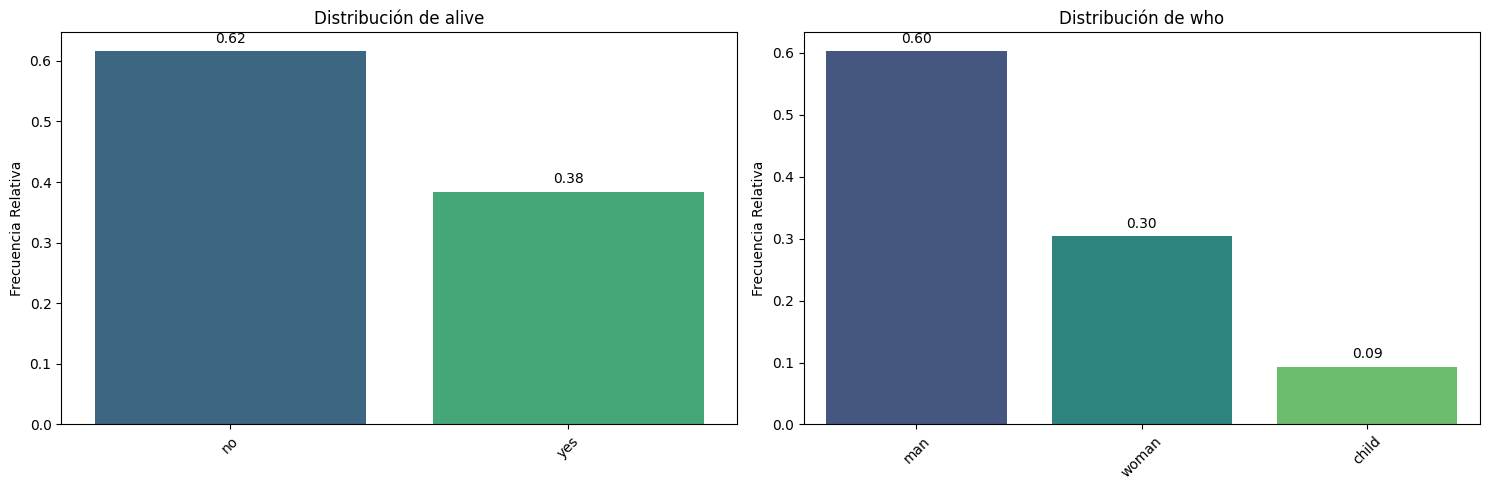

In [107]:
pinta_distribucion_categoricas(df,["alive","who"], relativa= True, mostrar_valores= True)

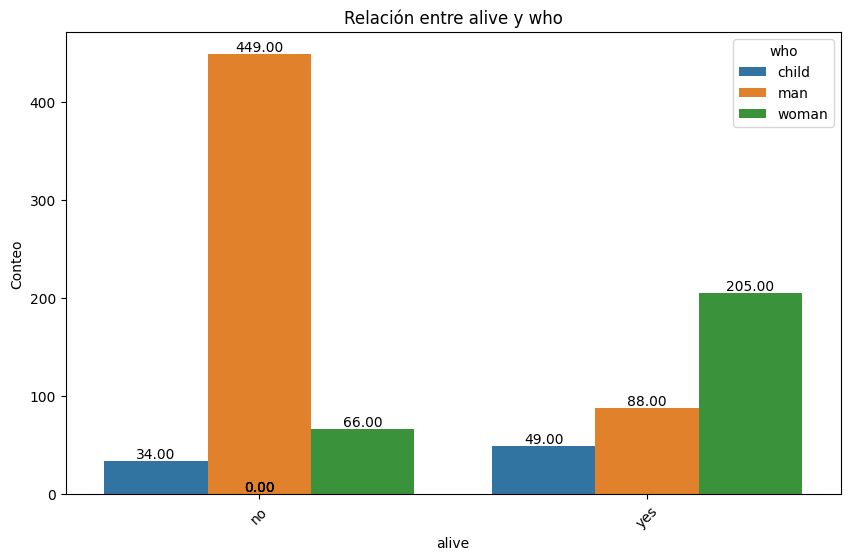

In [108]:
plot_categorical_relationship_fin(df,"alive","who", show_values=True )

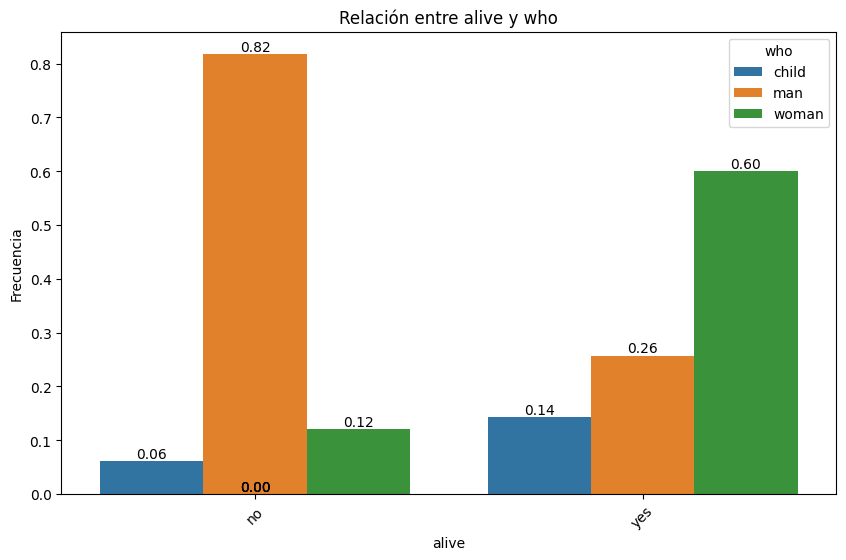

In [109]:
plot_categorical_relationship_fin(df,"alive","who",relative_freq=True,show_values=True)

In [110]:
# 2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?
# ¿ Y en términos relativos? 
# ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

#definitivamente la clase influye a la hora de sobrevivir o no. Los que no sobrevivían eran en su mayoría de tercera clase
#a la hora de sobrevivir, está más repartido, pero estadísticamente había muchas más personas de tercera.

In [111]:
df.groupby("alive", as_index=False)["class"].value_counts()

,alive,class,count
0,no,Third,372
1,no,Second,97
2,no,First,80
3,yes,First,136
4,yes,Third,119
5,yes,Second,87


In [112]:
df.groupby("alive",as_index=False)["class"].value_counts(normalize=True)

,alive,class,proportion
0,no,Third,0.677596
1,no,Second,0.176685
2,no,First,0.145719
3,yes,First,0.397661
4,yes,Third,0.347953
5,yes,Second,0.254386


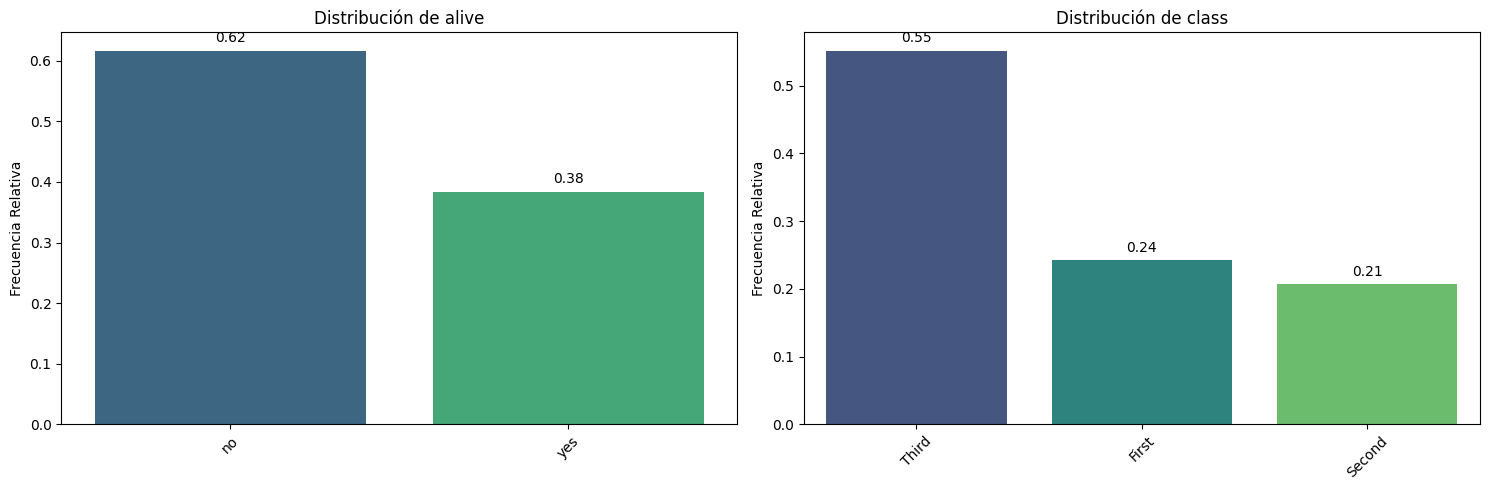

In [113]:
pinta_distribucion_categoricas(df,["alive","class"], relativa=True, mostrar_valores=True)

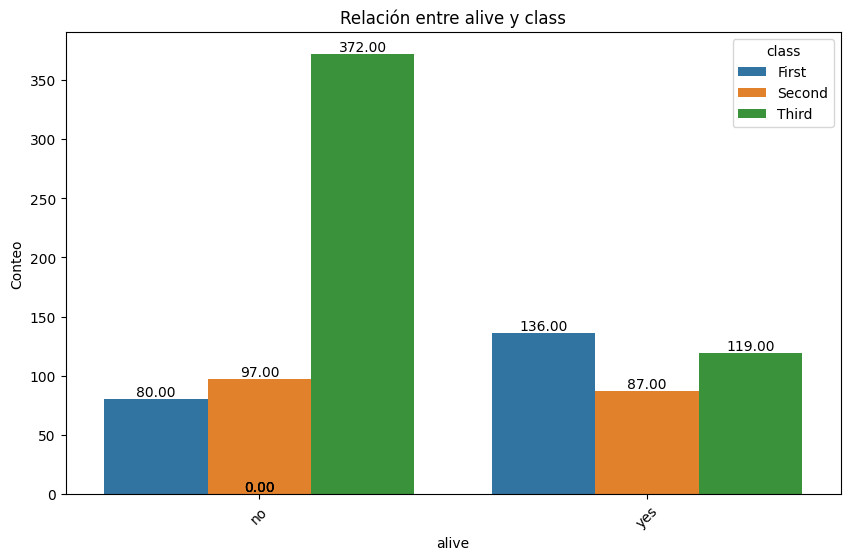

In [114]:
plot_categorical_relationship_fin(df,"alive","class", show_values=True )

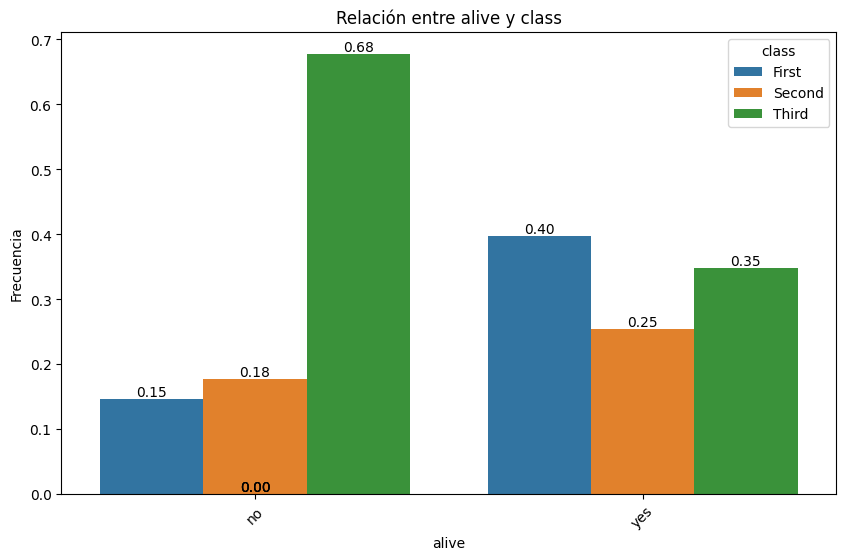

In [115]:
plot_categorical_relationship_fin(df,"alive","class",relative_freq=True,show_values=True)

In [116]:
# 3. ¿De qué ciudad sobrevivieron más personas?
# ¿Y porcentualmente de que ciudad sobrevivieron más personas? 
# ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

#en ambas es Southampton, pero el numero de personas que embarcaron allí es mayor en proporción con el resto
#no queda clara la relación

In [117]:
df.groupby("alive", as_index=False)["embark_town"].value_counts()

,alive,embark_town,count
0,no,Southampton,427
1,no,Cherbourg,75
2,no,Queenstown,47
3,yes,Southampton,219
4,yes,Cherbourg,93
5,yes,Queenstown,30


In [118]:
df.groupby("alive", as_index=False)["embark_town"].value_counts(normalize=True)

,alive,embark_town,proportion
0,no,Southampton,0.777778
1,no,Cherbourg,0.136612
2,no,Queenstown,0.085610
3,yes,Southampton,0.640351
4,yes,Cherbourg,0.271930
5,yes,Queenstown,0.087719


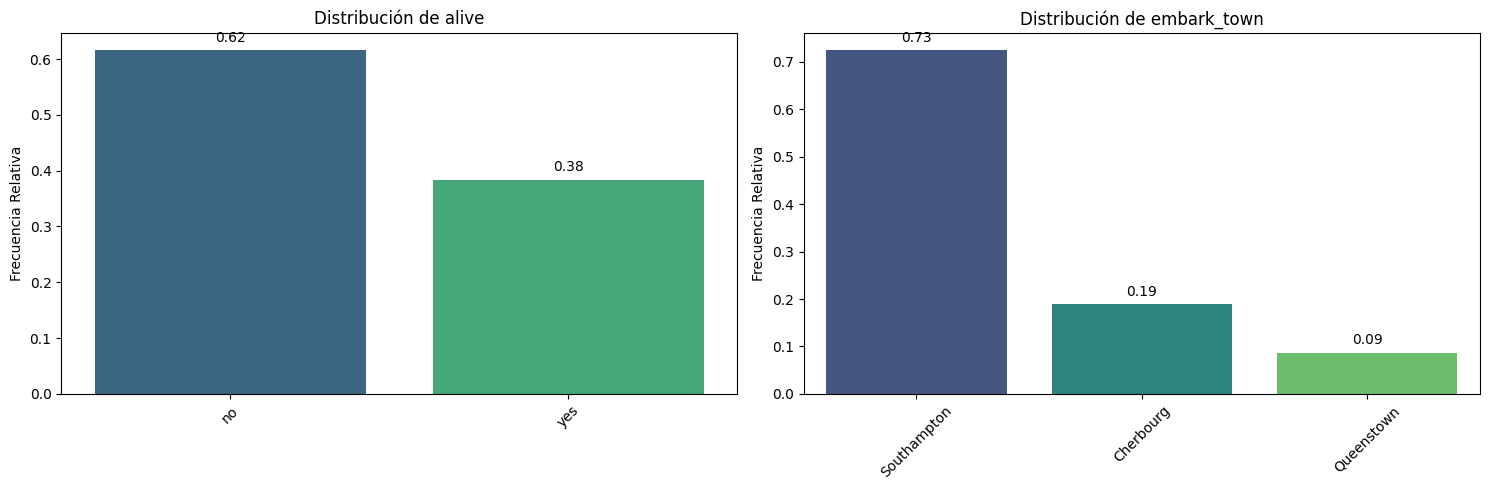

In [119]:
pinta_distribucion_categoricas(df,["alive","embark_town"], relativa= True, mostrar_valores= True)

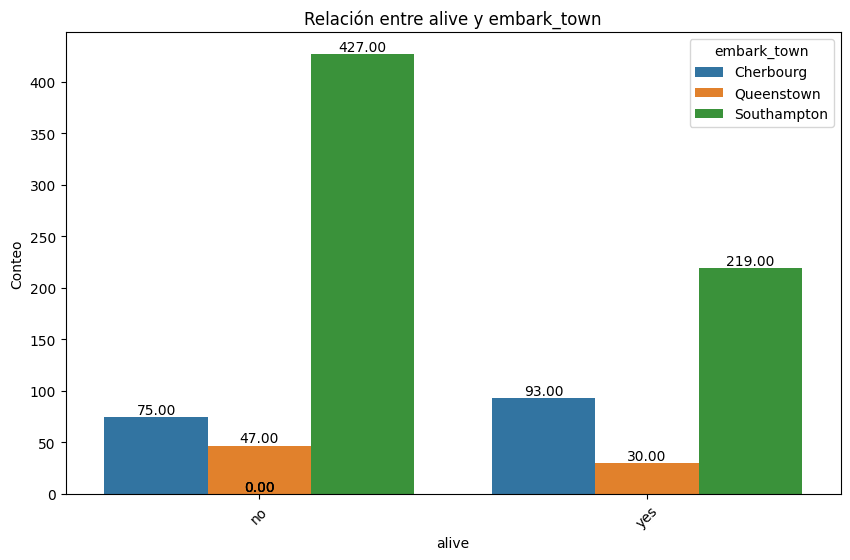

In [120]:
plot_categorical_relationship_fin(df,"alive","embark_town", show_values=True )

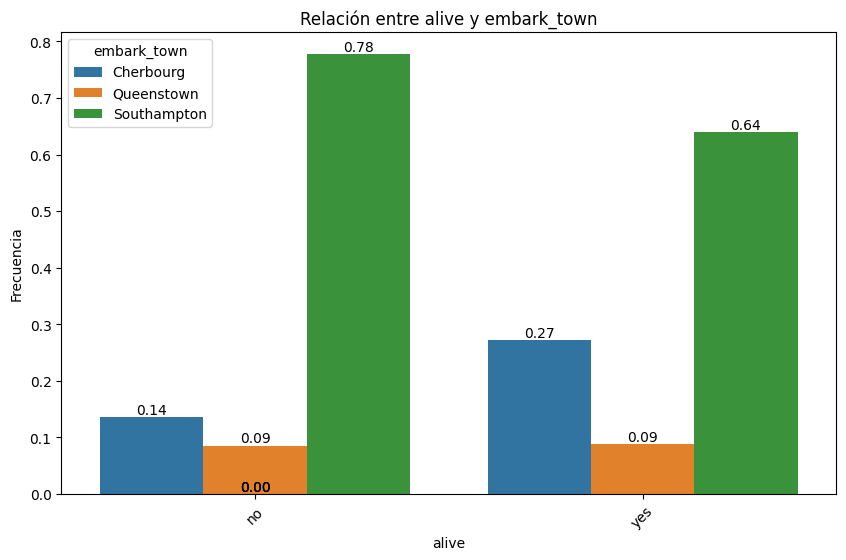

In [121]:
plot_categorical_relationship_fin(df,"alive","embark_town",relative_freq=True,show_values=True)

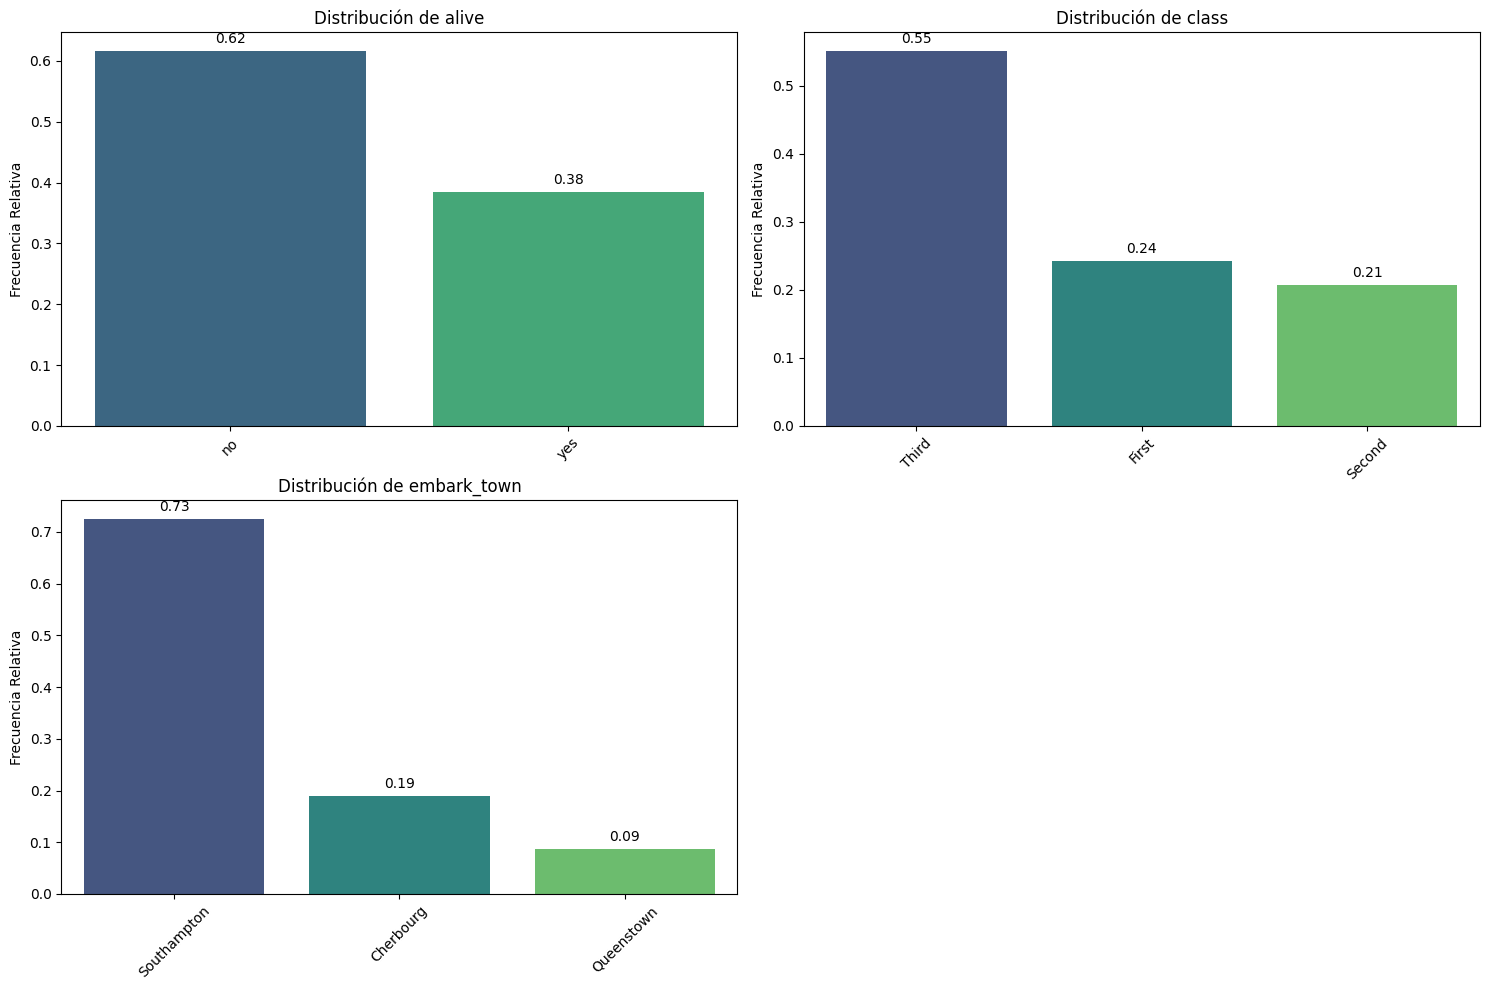

In [122]:
pinta_distribucion_categoricas(df,["alive","class","embark_town"], relativa= True, mostrar_valores= True)

In [123]:
df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


In [124]:
#podríamos cruzar las tres que son cats

In [125]:
columnas = ["alive","class","embark_town"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

Respuesta no:


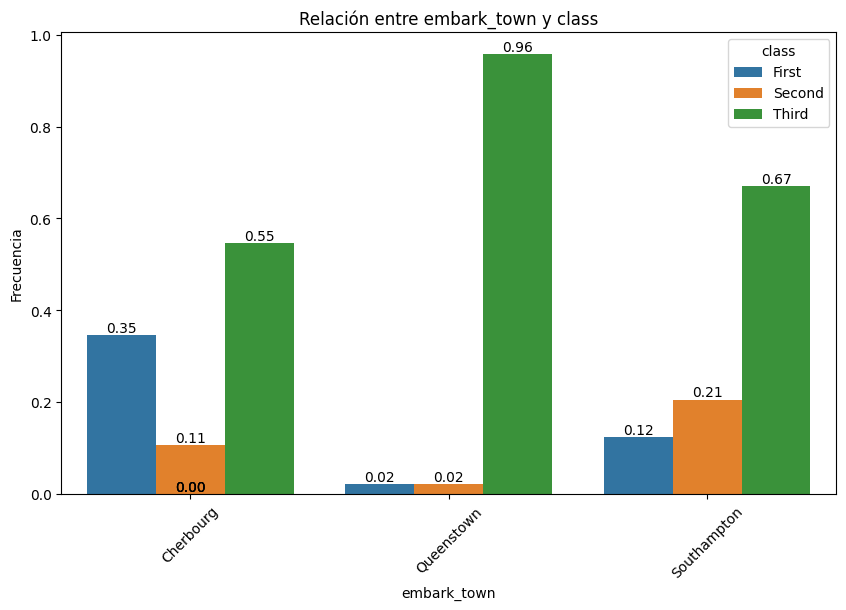

Respuesta yes:


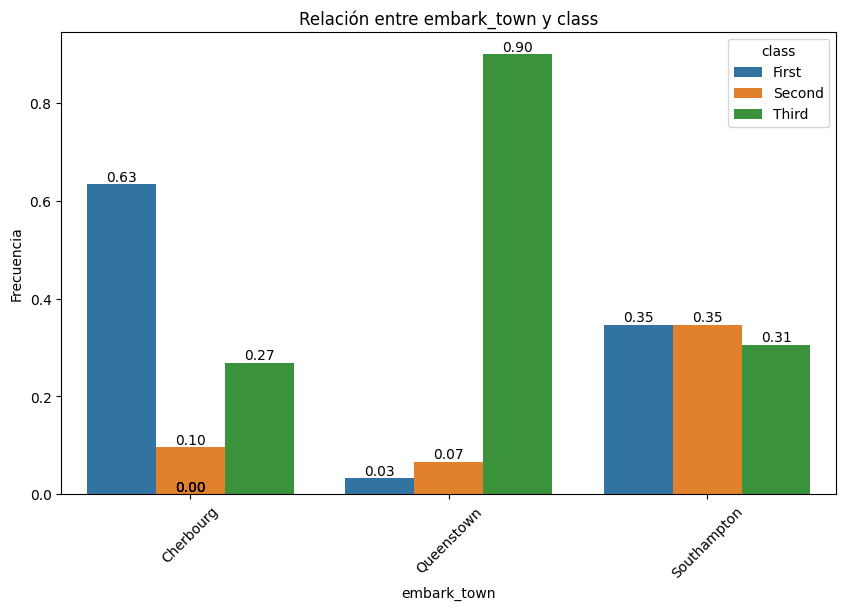

In [126]:
for valor,df_cruce in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_cruce,col_2,col_1, relative_freq= True, show_values= True)

In [127]:
#aqui vemos como dependiendo de la respuesta, la clase y el lugar, en Queenstown es mas o menos regular en as dos repsuestas
#en Southampton la supervivencia está más repartida entre las tres clases en el yes
#en Cherbourg, la primera y tercera clase se intercambian en funcion de la respuesta
#en cuanto al no, sin duda gana la tercera clase en los tres lugares

In [128]:
df

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


In [129]:
# 4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?
#

In [130]:
df.groupby("alive")["fare"].value_counts(normalize=True)

alive  fare    
no     8.0500      0.069217
       7.8958      0.067395
       13.0000     0.047359
       7.7500      0.040073
       26.0000     0.029144
                     ...   
yes    82.1708     0.002924
       83.4750     0.002924
       106.4250    0.002924
       108.9000    0.002924
       247.5208    0.002924
Name: proportion, Length: 330, dtype: float64

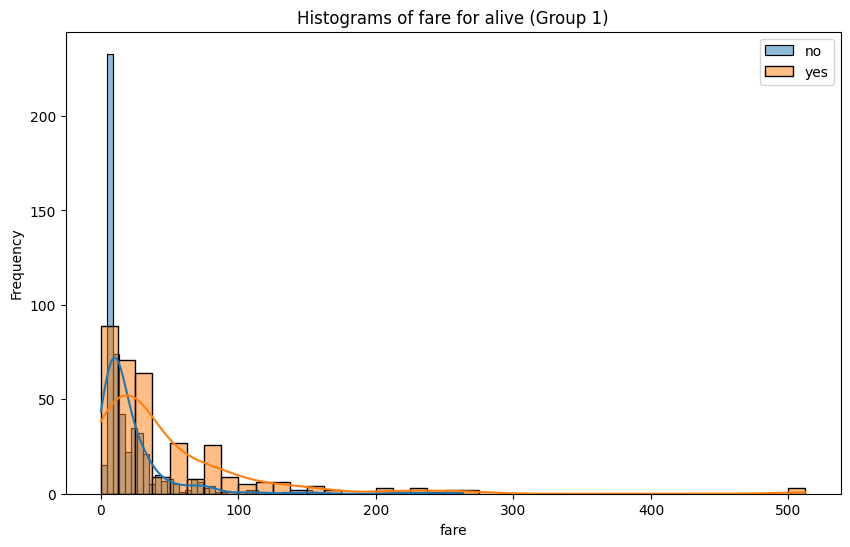

In [131]:
plot_grouped_histograms(df,cat_col="alive",num_col="fare",group_size=2)

In [132]:
grupo_a = df.loc[df.alive == "yes"]["fare"] #las mayusculas son importantes en el yes/no, sino, no da resultados
grupo_b = df.loc[df.alive == "no"]["fare"]

In [133]:
df.alive.value_counts(dropna=False)

alive
no     549
yes    342
Name: count, dtype: int64

In [134]:
df.fare.value_counts(dropna=False)

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

In [135]:
print(len(grupo_a), len(grupo_b))

342 549


In [136]:
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


In [137]:
#el valor p a priori parece que es mayor que 0.05, pero en realidad es notación científica y es un valor por debajo del umbral
#rechazamos hipóitesis nula, si que los grupos son bastante diferentes

In [138]:
#5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? 
# ¿Qué ocurrió con la persona que más dinero se dejó?

In [139]:
df.loc[df.fare == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


In [140]:
df_titanic.loc[df_titanic.fare == 0]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
277,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
466,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
481,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0,S,First,man,True,NaN,Southampton,no,True


In [141]:
#al ver el deck en la copia de seguridad del df, veo que solo 3 personas tienen un "deck" o camarote, 
# todas son hombres yembarcaron en Southampton, y tenian bastantes NaN en un inicio
# ninguna sobrevivió, iban solos, hombres adultos.
# podrían haberse colado (pero no habría registros)

In [142]:
df.loc[df.fare.idxmax()]

sex                  female
age                    35.0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
Name: 258, dtype: object

In [143]:
# 6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. 
# No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [144]:
df.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [145]:
df.groupby("class")["fare"].median() 

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

In [146]:
max_class = df.groupby(["class","embark_town"])["fare"].max()
max_class #no me vale, esta todo muy disperso, no puedo macar bins, borrar

class   embark_town
First   Cherbourg      512.3292
        Queenstown      90.0000
        Southampton    263.0000
Second  Cherbourg       41.5792
        Queenstown      12.3500
        Southampton     73.5000
Third   Cherbourg       22.3583
        Queenstown      29.1250
        Southampton     69.5500
Name: fare, dtype: float64

In [147]:
#df[["fare","fare_categoria","class"]]#borrar funcion proque no me sirve

In [148]:
df_vive = df[df["alive"] =="yes"]
df_vive

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1
...,...,...,...,...,...,...,...,...,...,...
875,female,15.0,7.2250,Third,child,False,Cherbourg,yes,True,0
879,female,56.0,83.1583,First,woman,False,Cherbourg,yes,False,1
880,female,25.0,26.0000,Second,woman,False,Southampton,yes,False,1
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0


In [149]:
df_muere = df[df["alive"] =="no"]
df_muere

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.000000,7.2500,Third,man,True,Southampton,no,False,1
4,male,35.000000,8.0500,Third,man,True,Southampton,no,True,0
5,male,33.173123,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.000000,51.8625,First,man,True,Southampton,no,True,0
7,male,2.000000,21.0750,Third,child,False,Southampton,no,False,4
...,...,...,...,...,...,...,...,...,...,...
884,male,25.000000,7.0500,Third,man,True,Southampton,no,True,0
885,female,39.000000,29.1250,Third,woman,False,Queenstown,no,False,5
886,male,27.000000,13.0000,Second,man,True,Southampton,no,True,0
888,female,32.000000,23.4500,Third,woman,False,Southampton,no,False,3


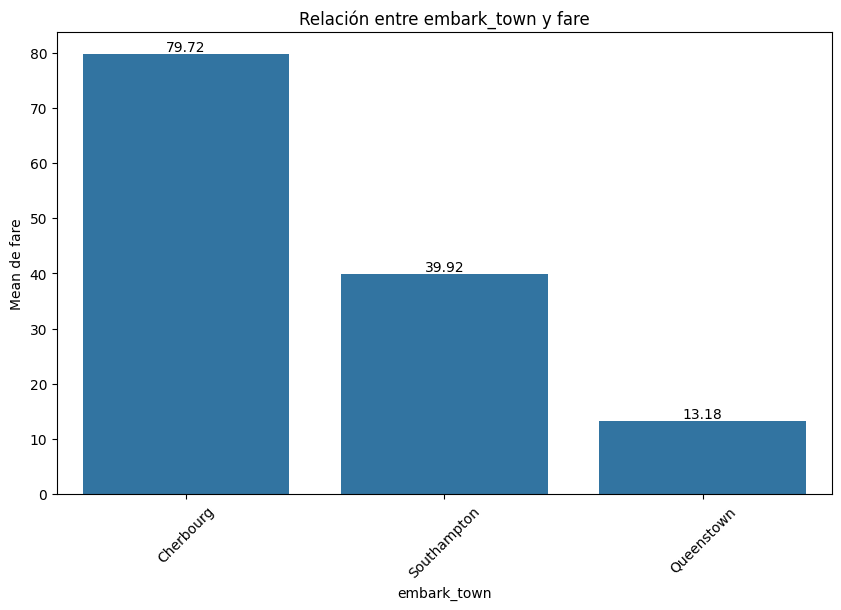

In [150]:
plot_categorical_numerical_relationship(df_vive,"embark_town","fare",show_values=True) 
# LOS QUE SI SOBREVIVIERON:

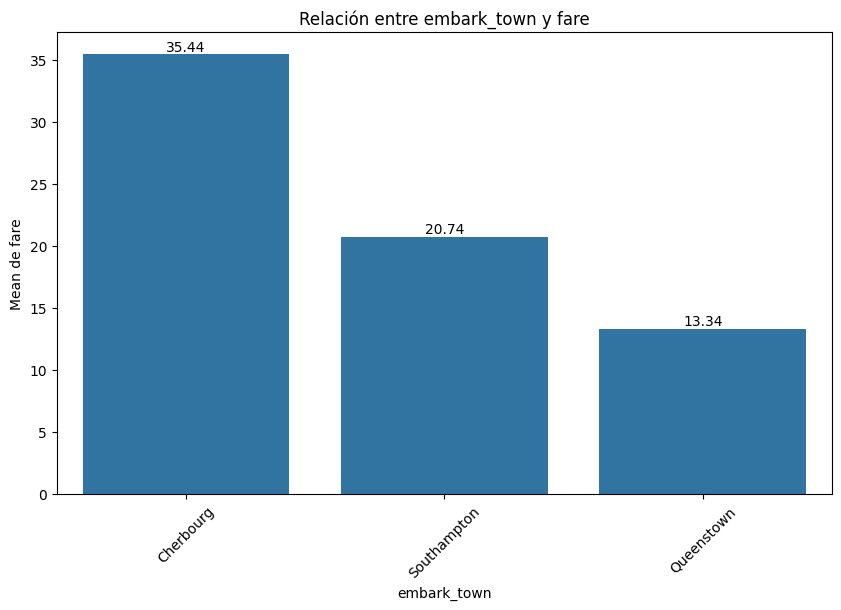

In [151]:
plot_categorical_numerical_relationship(df_muere,"embark_town","fare",show_values=True) 
# LOS QUE NO SOBREVIVIERON:

In [152]:
#de media pagan más caros los billetes los que si sobrevivieron que los que no
#en cuanto al precio, se mantiene relativamente estable: mas caro en Cherbourg que Southampton, y por ultimo Queenstown

In [153]:
# 7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. 
# ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?


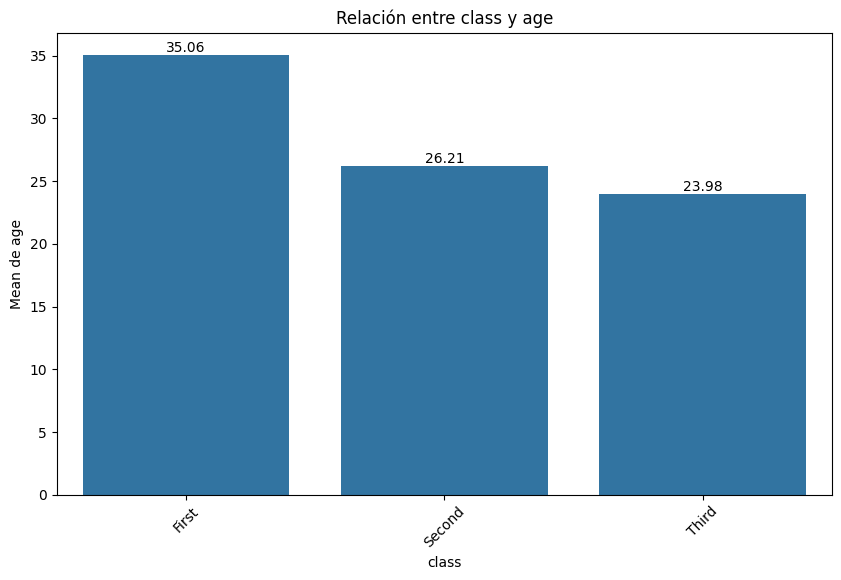

In [154]:
plot_categorical_numerical_relationship(df_vive,"class","age",show_values=True,) 
# LOS QUE SI SOBREVIVIERON:

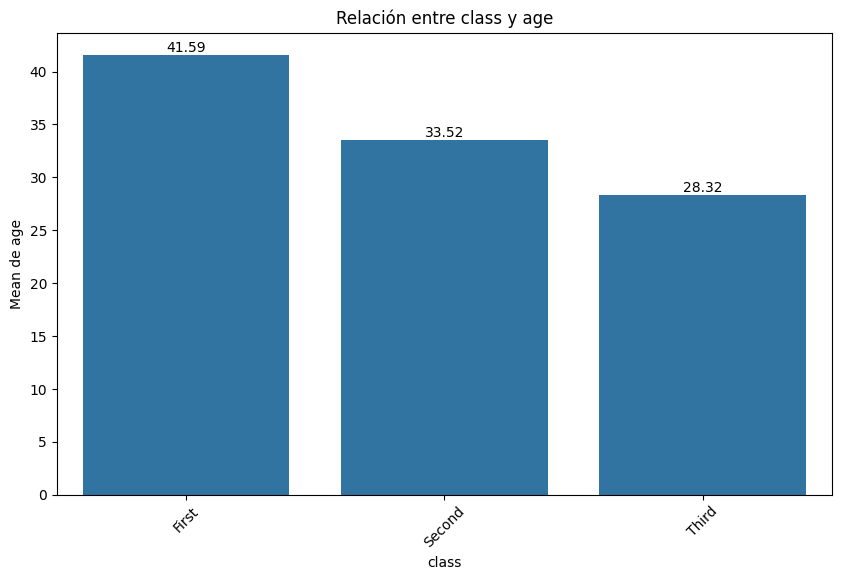

In [155]:
plot_categorical_numerical_relationship(df_muere,"class","age",show_values=True) 
# LOS QUE NO SOBREVIVIERON:

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?